<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
using LinearAlgebra, Random, Plots

In [4]:
function rand_graph(n)
    M = triu(rand(0:1,n,n),1)
    M = M + M'
end

rand_graph (generic function with 1 method)

In [7]:
Random.seed!(1)
rand_graph(4)

4×4 Array{Int64,2}:
 0  1  0  0
 1  0  1  0
 0  1  0  0
 0  0  0  0

Let's look at the adjacency eigenvalues of a random graph on 100 vertices.

In [8]:
n = 100
M = rand_graph(n)
e = eigvals(M)

100-element Array{Float64,1}:
 -9.899440503304053 
 -9.457179937183854 
 -9.0951044491663   
 -8.914828614499859 
 -8.438736489714188 
 -8.253311267248616 
 -8.095256532639619 
 -7.973886423849179 
 -7.657548401300873 
 -7.385261748737316 
 -7.188176962036212 
 -7.0174661633983195
 -6.800020701329969 
  ⋮                 
  6.104391153787267 
  6.4606731936943005
  6.4980742157788125
  6.979153068215918 
  7.061871362400443 
  7.276803903101386 
  7.458358268877714 
  7.552085198325971 
  8.202041651654616 
  8.362307383401996 
  9.00779440550398  
 48.74303483654694  

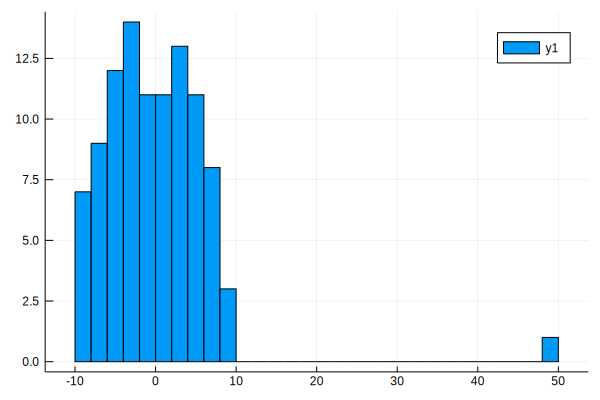

In [9]:
histogram(e,bins=50)

We see that there is one big eigenvalue, and the the others are concentrated around -10 to 10.  Let's just focus on those.  And, note that 10 is the square root of 100.

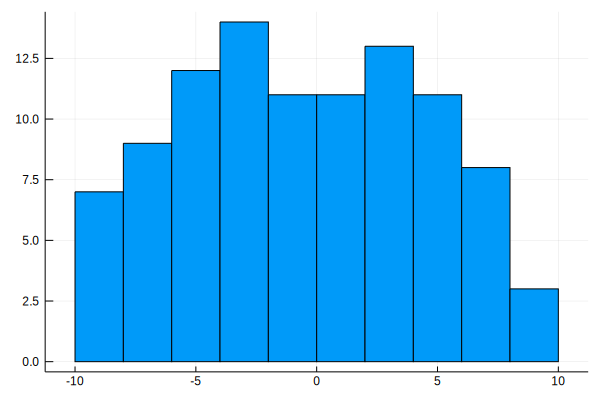

In [10]:
histogram(e[1:(n-1)], bins=10, legend=false)

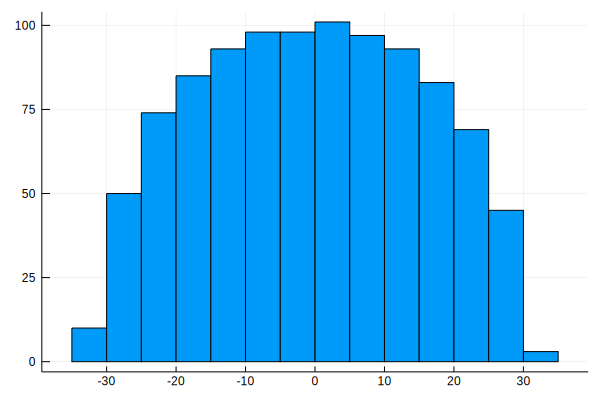

In [11]:
n = 1000
M = rand_graph(n)
e = eigvals(M)
histogram(e[1:(n-1)], bins=20, legend=false)

It turns out that these have a very disinct distribution.  It is called the semicircle law. To see it better, let's try a larger matrix.

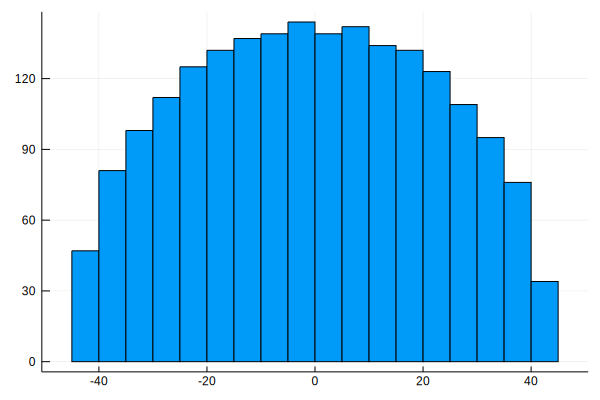

In [12]:
n = 2000
M = rand_graph(n)
e = eigvals(M)
histogram(e[1:(n-1)], bins=20, legend=false)

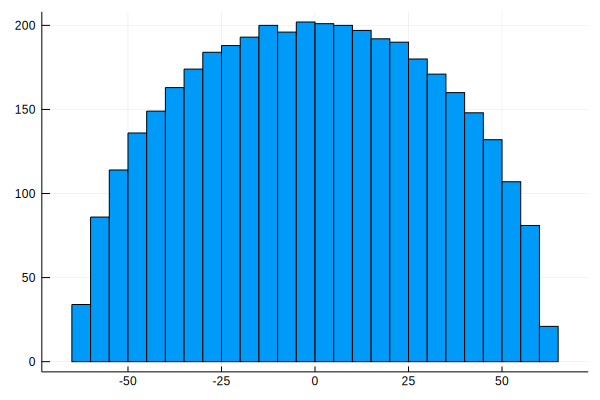

In [13]:
n = 4000
M = rand_graph(n)
e = eigvals(M)
histogram(e[1:(n-1)], bins=40, legend=false)

Or, we could generate many matrices, and combine their eigenvalues.

In [14]:
e = []
n = 100
for i in 1:1000
    M = rand_graph(n)
    append!(e,eigvals(M)[1:(n-1)])
end
histogram(e, bins=40, legend=false)

ErrorException: Cannot convert Float64 to series data for plotting

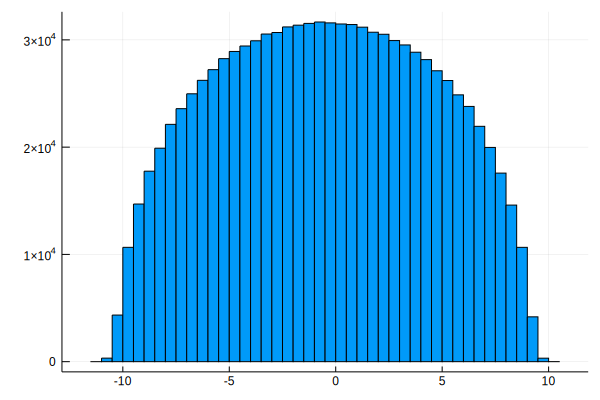

In [11]:
e = []
n = 100
for i in 1:10000
    M = rand_graph(n)
    append!(e,eigvals(M)[1:(n-1)])
end
histogram(e, bins=50, legend=false)

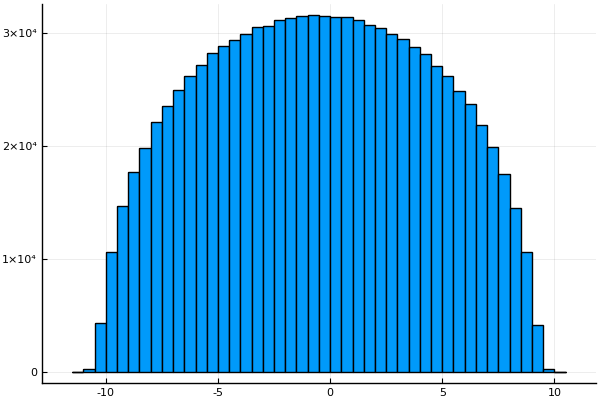

In [12]:
pyplot()
histogram(e, bins=50, legend=false)

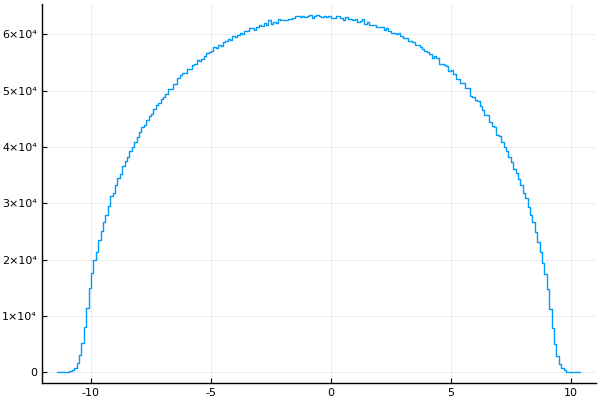

In [13]:
es = []
n = 100
for i in 1:100000
    M = rand_graph(n)
    append!(es,eigvals(M)[1:(n-1)])
end
histogram(es, legend=false)

Not only does the distribution have a very nice shape, but the minimum and maximum eigenvalues are almost never outside the edges of it.

In [14]:
minimum(es), maximum(es)

(-11.390911192092956, 10.303318799086734)

Let's generate just the distribution of $\mu_2$ and $\mu_n$.

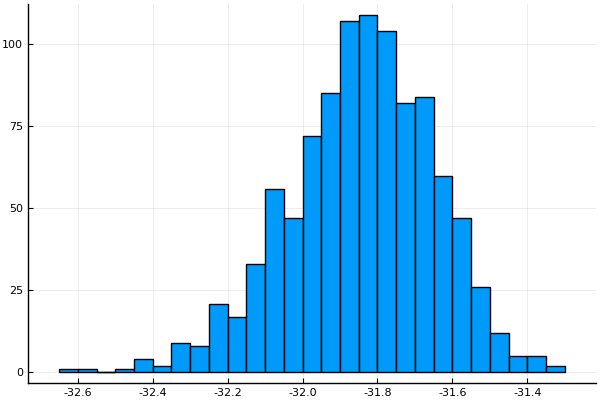

In [15]:
mins = []
maxes = []
n = 1000
for i in 1:1000
    M = rand_graph(n)
    e = eigvals(M)
    push!(mins, e[1])
    push!(maxes, e[n-1])
end
histogram(mins, legend=false)

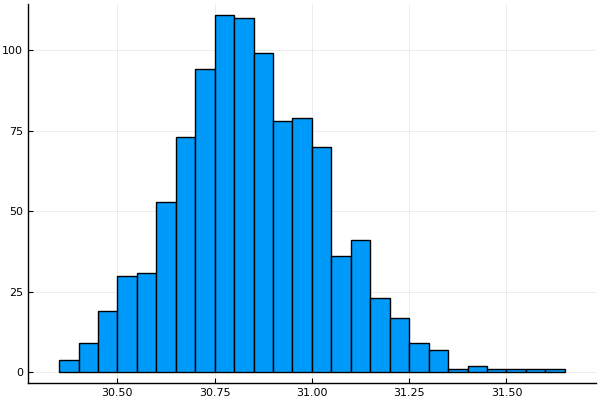

In [16]:
histogram(maxes, legend=false)

With p < 1/2

In [20]:
function rand_graph(n, p)
    M = triu(1 .* (rand(n,n) .< p) ,1)
    M = M + M'
end
rand_graph(10,0.2)

10×10 Array{Int64,2}:
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  1  0
 0  0  0  1  1  0  0  0  0  0
 0  0  1  0  1  1  1  0  0  1
 0  0  1  1  0  1  0  0  0  0
 0  0  0  1  1  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  1  0  0  0  0  0  1  0  1
 0  0  0  1  0  1  0  0  1  0

In [30]:
n = 1000
p = 0.1
M = rand_graph(1000, p)
    e = eigvals(M)
pp = p*(1-p)
minimum(e), e[end-1], 2*sqrt(p*(1-p)*n)

(-19.047647905186032, 18.687061011464415, 18.973665961010276)